# Обучение модели



In [2]:
import gdown
import numpy as np
from tensorflow.keras import backend as K
import os

# Загружаем предварительно аугментированный тренеровочный набор изображений.
# Распаковываем и удаляем скаченный архив.
if not os.path.exists('train'):
    if not os.path.exists('train.zip'):
        aug_train_zip_url = 'https://drive.google.com/uc?id=1ZHqymPmcdUoR0XF3V1wz-kTCKKLz0_SX'
        gdown.download(aug_train_zip_url, 'train.zip', False)
    ! unzip train.zip -d .
    ! rm train.zip

Downloading...
From: https://drive.google.com/uc?id=1ZHqymPmcdUoR0XF3V1wz-kTCKKLz0_SX
To: /content/train.zip
2.59GB [00:40, 63.2MB/s]


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ./train/sad/268.jpg     
  inflating: ./train/sad/2724.jpg    
  inflating: ./train/sad/5458.jpg    
  inflating: ./train/sad/aug181.jpg  
  inflating: ./train/sad/1691.jpg    
  inflating: ./train/sad/5183.jpg    
  inflating: ./train/sad/5321.jpg    
  inflating: ./train/sad/2419.jpg    
  inflating: ./train/sad/1245.jpg    
  inflating: ./train/sad/aug233.jpg  
  inflating: ./train/sad/1120.jpg    
  inflating: ./train/sad/4821.jpg    
  inflating: ./train/sad/4678.jpg    
  inflating: ./train/sad/6112.jpg    
  inflating: ./train/sad/678.jpg     
  inflating: ./train/sad/2717.jpg    
  inflating: ./train/sad/1213.jpg    
  inflating: ./train/sad/1612.jpg    
  inflating: ./train/sad/5882.jpg    
  inflating: ./train/sad/1775.jpg    
  inflating: ./train/sad/3796.jpg    
  inflating: ./train/sad/aug88.jpg   
  inflating: ./train/sad/1126.jpg    
  inflating: ./train/sad/6356.jpg    
  inflating: ./train

In [3]:
# Устанавливаем модуль import_ipynb и импортируем его.
# Он необходим для импорта файлов .ipynb.
try:
    import import_ipynb
except:
    ! pip install import-ipynb
    import import_ipynb

# Если проект отсутствует, клонируем его с Github. Далее из проекта нам понадобиться файл 
# модели - model.ipynb, расположенный в корне проекта.
# Импортируем из него функцию сборки модели
try:
    from skillbox_thesis_project.model import assemble_model
except ModuleNotFoundError:
    ! git clone https://github.com/GrinkoL/skillbox_thesis_project.git
    from skillbox_thesis_project.model import assemble_model
    
# Cобираем модель
model = assemble_model()
model.summary()

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=e1312189c22f3d2b658683e93280a8be946101198bfb4e121ca57135dbebd5c1
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Cloning into 'skillbox_thesis_project'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 177 (delta 8), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (177/177), 555.33 KiB | 30.85 MiB/s, done.
Resolving deltas: 100% (60/60), done.
importing Jupyter notebook from /content/skillbox_thesis_project/model.ipynb
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-6jcf8_jh
580075520/580070376 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)       

In [4]:
#  Определим функцию предобработки данных.
def preprocess_input(x, data_format=None):
    x_temp = np.copy(x)
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if data_format == 'channels_first':
        x_temp = x_temp[:, ::-1, ...]
        x_temp[:, 0, :, :] -= 93.5940
        x_temp[:, 1, :, :] -= 104.7624
        x_temp[:, 2, :, :] -= 129.1863
    else:
        x_temp = x_temp[..., ::-1]
        x_temp[..., 0] -= 93.5940
        x_temp[..., 1] -= 104.7624
        x_temp[..., 2] -= 129.1863
    return x_temp

In [5]:
# Имплементируем итератор.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(preprocessing_function=preprocess_input)
iter = gen.flow_from_directory('train', target_size=(224,224), batch_size=200)

Found 63198 images belonging to 9 classes.


In [6]:
iter.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7,
 'uncertain': 8}

In [7]:
! pip install livelossplot > /dev/null
from livelossplot import PlotLossesKeras

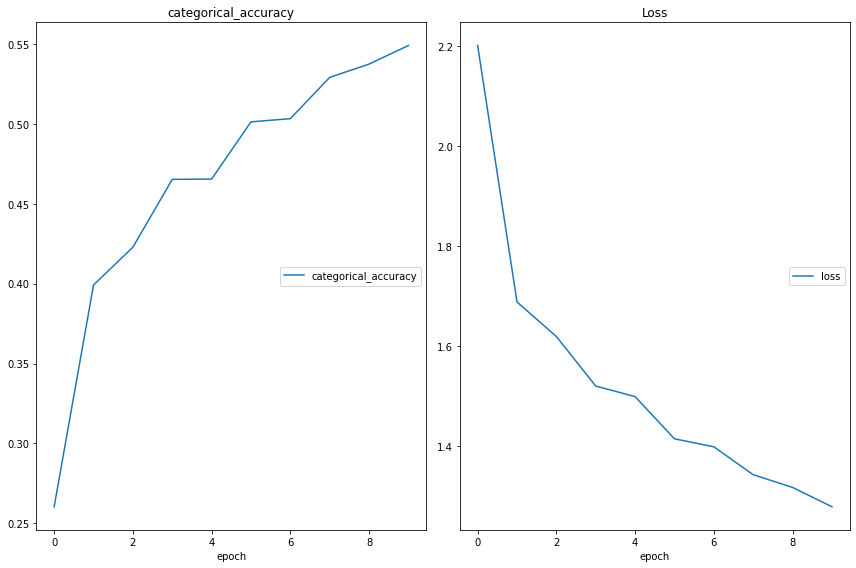

categorical_accuracy
	categorical_accuracy 	 (min:    0.260, max:    0.549, cur:    0.549)
Loss
	loss             	 (min:    1.279, max:    2.202, cur:    1.279)


In [8]:
model.fit(iter, epochs=10, steps_per_epoch=30, callbacks=[PlotLossesKeras()])